#### Train Models with Feature selection Skin Disorder 

# Import Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [3]:
file_path = r'S:\Projects\Capstone Projects\#3 Skin Disorder\dataset_35_dermatology (1).csv'

data = pd.read_csv(file_path)

In [4]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


# Convert 'Age' column object to numeric 

In [5]:

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [7]:

# Fill missing values in the "Age" column with the mean
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)


# Check if there are still any missing values in the dataset
print(data.isnull().sum())

# Print the first few rows of the cleaned DataFrame
print(data.head())


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

# Feature Selection based on Correlation and Importance

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Compute the correlation matrix
corr_matrix = data.corr().abs()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set correlation threshold for removal (adjust as needed)
threshold = 0.8

# Find features with correlation above or below threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold) or any(upper[column] < -threshold)]

# Drop features with high correlation from the dataframe
data_filtered = data.drop(to_drop, axis=1)

# Separate features and target
X = data_filtered.drop('class', axis=1)
y = data_filtered['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier on the filtered data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance from the trained model
feature_importance = clf.feature_importances_

# Select features based on importance (optional)
sfm = SelectFromModel(clf, threshold='median')
X_selected = sfm.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices = sfm.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices].tolist()
print("Selected features:", selected_features)


Accuracy: 0.96
Selected features: ['definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'scalp_involvement', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'munro_microabcess', 'spongiosis', 'Age']


In [9]:
data_selected = data[selected_features + ['class']]

In [10]:
data_selected.columns

Index(['definite_borders', 'itching', 'koebner_phenomenon',
       'polygonal_papules', 'scalp_involvement', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis',
       'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges',
       'munro_microabcess', 'spongiosis', 'Age', 'class'],
      dtype='object')

# remove features that have correlations above 0.8 or below -0.8

# defing Independent variables as x and Dependent variable(Target variable ) as y

In [11]:
X = data_selected.drop('class', axis=1)

In [12]:
X

,definite_borders,itching,koebner_phenomenon,polygonal_papules,scalp_involvement,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,munro_microabcess,spongiosis,Age
0,0,3,0,0,0,0,0,3,0,0,0,3,55.0
1,3,2,1,0,1,1,0,1,2,2,1,0,8.0
2,2,3,1,3,0,0,0,1,0,0,0,3,26.0
3,2,0,0,0,2,3,0,0,2,2,0,0,40.0
4,2,2,2,2,0,0,0,1,0,0,0,2,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,0,1,0,0,1,0,1,0,0,0,1,25.0
362,1,0,1,0,0,0,0,2,0,0,0,1,36.0
363,2,2,3,2,0,0,0,3,0,0,0,0,28.0
364,3,1,2,3,0,0,0,3,0,0,0,0,50.0


In [13]:
y = data_selected['class']

In [14]:
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

# Imbalanced Class Detection

In [15]:

class_distribution = y.value_counts(normalize=True)
print(class_distribution)


class
1    0.306011
3    0.196721
2    0.166667
5    0.142077
4    0.133880
6    0.054645
Name: proportion, dtype: float64


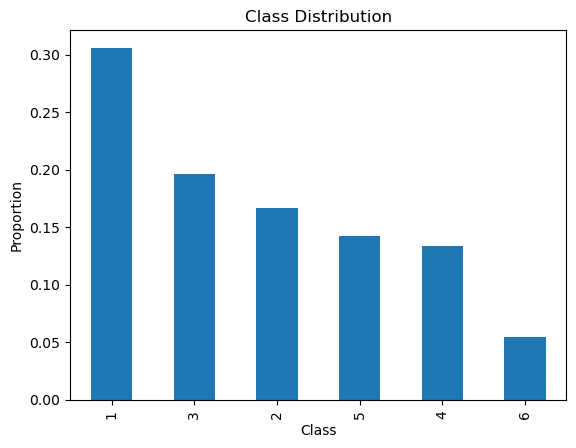

In [16]:
# Visualize Class Distribution:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

### imbalance data analysis
- The imbalance in the target variable "class" is evident, as Class 1 dominates the dataset with a high percentage.
- Class 6 minority classes, which could pose challenges during model training, especially for algorithms sensitive to class imbalance.

# Handling Imbalanced data

In [17]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(X, y)

# Convert the oversampled data back to a DataFrame if needed
X_smote = pd.DataFrame(X_smote, columns=X.columns)  

# Now X_smote and y_smote contain the oversampled data


In [18]:
X_smote

,definite_borders,itching,koebner_phenomenon,polygonal_papules,scalp_involvement,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,munro_microabcess,spongiosis,Age
0,0,3,0,0,0,0,0,3,0,0,0,3,55.0
1,3,2,1,0,1,1,0,1,2,2,1,0,8.0
2,2,3,1,3,0,0,0,1,0,0,0,3,26.0
3,2,0,0,0,2,3,0,0,2,2,0,0,40.0
4,2,2,2,2,0,0,0,1,0,0,0,2,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0,1,0,0,0,0,0,1,0,0,0,3,12.0
668,0,1,0,0,0,0,0,2,0,0,0,1,22.0
669,2,0,0,0,0,0,0,2,0,0,0,0,8.0
670,2,0,0,0,0,0,0,2,1,0,0,0,7.0


In [19]:

class_distribution = y_smote.value_counts(normalize=True)
print(class_distribution)

class
2    0.166667
1    0.166667
3    0.166667
5    0.166667
4    0.166667
6    0.166667
Name: proportion, dtype: float64


### Visualize Class Distribution: after balancing the data

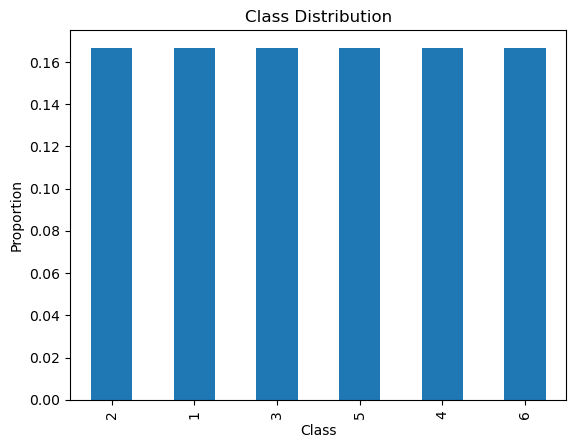

In [20]:
class_distribution_balanced = y_smote.value_counts(normalize=True)
class_distribution_balanced.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

# Splitting the dataset into the Training set and Test set

In [21]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=4)

In [22]:
x_train

,definite_borders,itching,koebner_phenomenon,polygonal_papules,scalp_involvement,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,munro_microabcess,spongiosis,Age
585,1,0,0,0,0,0,0,3,0,0,0,2,16.0
238,2,2,0,0,1,0,0,2,2,1,0,0,60.0
179,2,2,0,2,0,0,0,3,0,0,0,3,36.0
328,0,1,0,0,0,1,0,2,0,0,0,3,18.0
482,1,0,1,0,0,0,0,2,0,0,0,2,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0,0,0,0,2,0,0,2,0,0,0,1,8.0
360,1,1,0,0,0,1,0,2,0,0,0,3,25.0
439,3,3,1,2,0,0,0,2,0,0,0,0,52.0
174,2,2,0,2,0,0,0,2,0,0,0,3,40.0


In [23]:
y_train

585    6
238    1
179    3
328    4
482    4
      ..
599    6
360    2
439    3
174    3
122    6
Name: class, Length: 537, dtype: int64

# Logistic Regression Model Creation

In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() 
clf.fit(x_train,y_train) 

LogisticRegression()

In [24]:
y_pred=clf.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 2, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 6, 1, 4, 5, 6, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 2, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [25]:
y_test

507    4
320    1
615    6
379    2
70     2
      ..
68     5
405    2
376    2
340    1
153    1
Name: class, Length: 135, dtype: int64

In [26]:
# Calculate accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9703703703703703


In [27]:
y_pred_train = clf.predict(x_train)
y_pred_test =clf.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.962756052141527
Testing Accuracy: 0.9703703703703703


In [28]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  0  0  0  0  0]
 [ 0 22  0  0  0  2]
 [ 0  0 21  0  0  0]
 [ 0  2  0 24  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


# The Logistic Regression model achieves a training accuracy of 96.28% and a testing accuracy of 97.04%, demonstrating its ability to learn patterns in the training data and generalize well to new, unseen data with strong predictive performance.

# DecisionTreeClassifier Model Creation

In [29]:
#For classification tasks
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=DTC.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 6, 1, 4, 5, 6, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 4, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 6, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [31]:
y_test

507    4
320    1
615    6
379    2
70     2
      ..
68     5
405    2
376    2
340    1
153    1
Name: class, Length: 135, dtype: int64

In [32]:
# Calculate accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9703703703703703


In [33]:
y_pred_train = DTC.predict(x_train)
y_pred_test =DTC.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9703703703703703


In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[25  0  0  0  0  1]
 [ 0 21  0  1  0  2]
 [ 0  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


# The Decision Tree model achieves perfect training accuracy (100%) and a high testing accuracy of 97.04%, showcasing its ability to learn the training data well and generalize effectively to new, unseen data with strong predictive performance.

# RandomForestClassifier model creation.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
RFC = RandomForestClassifier(random_state=42)

# Train the model
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Make predictions on the test data
y_pred = RFC.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 6, 1, 4, 5, 6, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 4, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [37]:
y_test

507    4
320    1
615    6
379    2
70     2
      ..
68     5
405    2
376    2
340    1
153    1
Name: class, Length: 135, dtype: int64

In [38]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [39]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.88      0.93        24
           3       1.00      1.00      1.00        21
           4       0.96      1.00      0.98        26
           5       1.00      1.00      1.00        20
           6       0.90      1.00      0.95        18

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



In [40]:
# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[26  0  0  0  0  0]
 [ 0 21  0  1  0  2]
 [ 0  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


In [41]:
y_pred_train = RFC.predict(x_train)
y_pred_test = RFC.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9777777777777777


# The Random Forest classifier achieves perfect training accuracy (100%) and high testing accuracy (97.78%), demonstrating its ability to capture complex relationships in the data while maintaining strong predictive performance on new, unseen data.

# GradientBoostingClassifier model creation.

In [42]:
#For classification tasks
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [43]:
# Make predictions on the test data
y_pred = GBC.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 6, 1, 4, 5, 6, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [44]:
y_test

507    4
320    1
615    6
379    2
70     2
      ..
68     5
405    2
376    2
340    1
153    1
Name: class, Length: 135, dtype: int64

In [45]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9851851851851852


In [46]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.92      0.96        24
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        20
           6       0.90      1.00      0.95        18

    accuracy                           0.99       135
   macro avg       0.98      0.99      0.98       135
weighted avg       0.99      0.99      0.99       135



In [47]:
# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[26  0  0  0  0  0]
 [ 0 22  0  0  0  2]
 [ 0  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


In [48]:
y_pred_train = GBC.predict(x_train)
y_pred_test = GBC.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9851851851851852


# The Gradient Boosting model exhibits excellent performance with a training accuracy of 100% and a testing accuracy of 98.52%, indicating its robustness in learning complex patterns and its ability to generalize well to unseen data.

# Scaling

In [24]:
#Scaling : Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create Support Vector Classifier (SVC)

In [50]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) 
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [51]:
y_pred = svc_model.predict(X_test_scaled)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 6, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 2, 1, 4, 5, 2, 6, 2, 3, 6, 5, 5, 3, 4, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 2, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [52]:
y_test

507    4
320    1
615    6
379    2
70     2
      ..
68     5
405    2
376    2
340    1
153    1
Name: class, Length: 135, dtype: int64

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [54]:
y_pred_train = svc_model.predict(X_train_scaled)
y_pred_test = svc_model.predict(X_test_scaled)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9683426443202979
Testing Accuracy: 0.9777777777777777


## The Support Vector Classifier (SVC) demonstrates strong performance with a training accuracy of 96.83% and testing accuracy of 97.78%, showcasing its ability to generalize well to unseen data while maintaining high predictive accuracy.

# Create MLPClassifier model

In [25]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,  # Regularization parameter
    random_state=42,
    max_iter=200,  # Increase max_iter for convergence
    early_stopping=True,  # Stop training when validation score doesn't improve
    verbose=True  # Print progress during training
)


In [26]:
# Train the model
model.fit(X_train_scaled, y_train)

Iteration 1, loss = 2.04404839
Validation score: 0.185185
Iteration 2, loss = 1.85751120
Validation score: 0.240741
Iteration 3, loss = 1.70252275
Validation score: 0.333333
Iteration 4, loss = 1.56741331
Validation score: 0.444444
Iteration 5, loss = 1.44347368
Validation score: 0.500000
Iteration 6, loss = 1.31913309
Validation score: 0.574074
Iteration 7, loss = 1.19104832
Validation score: 0.722222
Iteration 8, loss = 1.06282992
Validation score: 0.851852
Iteration 9, loss = 0.93612256
Validation score: 0.888889
Iteration 10, loss = 0.81274898
Validation score: 0.907407
Iteration 11, loss = 0.69673750
Validation score: 0.925926
Iteration 12, loss = 0.58982247
Validation score: 0.944444
Iteration 13, loss = 0.49520697
Validation score: 0.962963
Iteration 14, loss = 0.41520015
Validation score: 0.944444
Iteration 15, loss = 0.35151404
Validation score: 0.962963
Iteration 16, loss = 0.30114060
Validation score: 0.962963
Iteration 17, loss = 0.26092852
Validation score: 0.962963
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
              random_state=42, verbose=True)

In [27]:
# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [30]:
# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9497
Test Accuracy: 0.9556


# The Multi-Layer Perceptron (MLP) Neural Network achieves a training accuracy of 94.97% and a testing accuracy of 95.56%, indicating its capability to learn complex patterns in the training data and generalize effectively to new, unseen data with good predictive performance.